In [23]:
#This a draft report that will be shared with Humanitarian NGOs in Moria

# AI for Good Simulator Model Report

# 1. Overview of the report

This report provides simulation-based estimates for COVID-19 epidemic scenarios for the Moria camp on Lesbos, an island of Greece. This is one of the largest refugee camps in Europe. There are estimated around 20,000 people currently living in the camp. 
1. quite a lot of terminologies in the modelling world, we need to simplify the lingo. Get rid of some of the jargons - add a legend for important jargons that will come up consistently over the whole report.
2. summarise three major findings and three different assumptions maybe (it is too much information bullet point here). Difficult to grasp the information because each bullet points are seperate and require a different train of thought. (why can I do? why is it useful, what can be interpreted from the model)

* We use a transmission model to project the COVID-19 epidemic in Moria; it accounts for the age structure wthin the camp esitmated from medical record, as well as uncertainty in transmission due to uncertainty in 𝑅0 (basic reproduction number)
* We consider an unmitigated epidemic (i.e., no intervention), and then several interventions that are currently being implemented (better hygiene, move high-risk residents offsite, isolate sympotomatically infected residents) and the interventions that are not currenlty implemented but are under consideration (shielding) to decrease transmission.
* We estimate predicted peak counts and timing for Moria in new symptomatic cases and deaths (incidence), as well as peaks in daily hospital demand (prevalence). We also calculated totals for these values, and compute the impact of the interventions relative to an unmitigated epidemic.
* The totals for hospital demand are calculated in terms of person/days, which can be translated into the total required expenditure on hospitalised care at different levels.
* Populations are based on upsampling from the annoynomised medical records provided by medcial organsiations working on the ground and estimated contact patterns based on synthesised contact matrix from Wuhan.
* The transmission model is based on global outbreak data, which have primarily been observed in Asia, Europe, and North America and these parameters have been advised by the London School of Hygiene and Tropical Medicine.
* Severity rates are rescaled from the global setting. In future work, we might have to scale the rates up since in camp settings many people lack the access to basic healthcare so residents will in general have higher rates of symptomatic disease.
* We start the epidemic simulation with 1 random symptomatically infected person and 1 asymptomatically infected person and we refer to this day 0 as the initial introduction. This corresponds roughly to when the virus initially arrives in the camp. Due to under-reporting and subclinical disease, the day cannot be directly determined from reported cases.
* This report is a working document and will be updated as more information is becoming avaialble as we are refining our modelling approach in lieu to the most updated modelling literature and intervention approaches.
* All numerical results are reported to two significant figures only, and are reported as interquartile range (IQR - 25 precentile and 75 percentile).
* Detailed modelling methods are explained at the end of the report.

# 2. Unmitigated COVID-19 Epidemic Trajectory

In [ ]:
write high level insights and reference to different tables down low

In [3]:
#flesh this out into a table
from IPython.display import HTML, display

In [4]:
from preprocess import read_preprocess_file
from tables import *

In [5]:
baseline=read_preprocess_file('./model_outcomes'+'/baseline.csv')

In [6]:
incidence_table_all=incidence_all_table(baseline)

In [7]:
HTML(incidence_table_all.to_html(index=False))

In [8]:
incidence_table_age=incidence_age_table(baseline)

In [9]:
incidence_table_age

Peak Day, IQR Peak Number, IQR
Incident Cases  all ages            49-62        1589-2091
                <9 years            53-68          235-335
                10-19 years         48-62          369-483
                20-29 years         47-60          508-654
                30-39 years         49-62          285-374
                40-49 years         49-62          132-173
                50-59 years         50-64            64-84
                60-69 years         52-66            18-25
                70+ years           52-66              5-7
Hospital Demand all ages            56-70            57-70
                <9 years            60-74              3-3
                10-19 years         55-68              4-5
                20-29 years         53-66              7-8
                30-39 years         55-70              7-9
                40-49 years         55-68            10-12
                50-59 years         56-70            13-17
                60-69 years         58-72             9-11
                70+ years           58-74              4-5
Critical Demand all ages            58-72             9-10
                <9 years            66-82              0-0
                10-19 years         55-68              1-1
                20-29 years         53-66              1-1
                30-39 years         57-70              1-1
                40-49 years         56-70              2-2
                50-59 years         58-73              2-2
                60-69 years         62-78              1-2
                70+ years           63-80              1-1

In [10]:
comulative_table_all=cumulative_all_table(baseline)

In [11]:
HTML(comulative_table_all.to_html(index=False))

In [11]:
count_table_age=cumulative_age_table(baseline)

In [12]:
count_table_age

First month First three months  \
Symptomatic Cases    all ages        147-596          6636-7088   
                     <9 years          14-56          1047-1251   
                     10-19 years       19-76            752-791   
                     20-29 years      51-206          1761-1809   
                     30-39 years      28-112          1265-1326   
                     40-49 years       19-78            837-871   
                     50-59 years       11-44            570-602   
                     60-69 years        4-18            305-332   
                     70+ years           1-5             98-107   
Hospital Person-Days all ages           7-21          1811-2157   
                     <9 years            0-1             79-111   
                     10-19 years         1-2            134-154   
                     20-29 years         1-3            222-246   
                     30-39 years         1-3            234-272   
                     40-49 years         1-4            318-365   
                     50-59 years         2-5            424-503   
                     60-69 years         1-2            270-340   
                     70+ years           0-1            129-164   
Critical Person-days all ages            1-3            322-399   
                     <9 years            0-0              13-21   
                     10-19 years         0-0              24-29   
                     20-29 years         0-0              41-46   
                     30-39 years         0-0              42-50   
                     40-49 years         0-1              58-68   
                     50-59 years         0-1              75-93   
                     60-69 years         0-0              46-63   
                     70+ years           0-0              22-30   
Deaths               all ages            0-0              54-68   
                     <9 years            0-0                2-3   
                     10-19 years         0-0                4-5   
                     20-29 years         0-0                7-8   
                     30-39 years         0-0                7-9   
                     40-49 years         0-0              10-12   
                     50-59 years         0-0              13-16   
                     60-69 years         0-0               8-11   
                     70+ years           0-0                4-5   

                                 First six months  
Symptomatic Cases    all ages           6722-7093  
                     <9 years           1079-1254  
                     10-19 years          759-791  
                     20-29 years        1771-1809  
                     30-39 years        1279-1326  
                     40-49 years          845-871  
                     50-59 years          578-602  
                     60-69 years          312-332  
                     70+ years            100-107  
Hospital Person-Days all ages           2147-2239  
                     <9 years             103-119  
                     10-19 years          153-159  
                     20-29 years          248-252  
                     30-39 years          272-281  
                     40-49 years          367-376  
                     50-59 years          503-522  
                     60-69 years          337-357  
                     70+ years            163-173  
Critical Person-days all ages             478-502  
                     <9 years               25-27  
                     10-19 years            33-35  
                     20-29 years            52-56  
                     30-39 years            59-63  
                     40-49 years            79-84  
                     50-59 years          111-118  
                     60-69 years            78-81  
                     70+ years              38-39  
Deaths               all ages               70-74  
                     <9 years                

In [14]:
#put a disclaimer that there can be a delay

In [12]:
from plots import plot_by_age,plot_by_age_interactive

In [13]:
plot_by_age_interactive(plot_by_age,baseline)

# 3. Intervention Scenarios

We assumed these interventions are applied at the camp wide level and they are assumed to have full coverage starting from a certain day that is specified by the simulation and there are five interventions that are currently implemented. 

* Improved handwashing, better PPE equipment for everyone and other interventions that aim to reduce person-to-person transmission probabilities that is not location specific belongs to this first group of intervention. Here we set the effectiveness of the intervention as anther variable: 25% reduction in transmission rate: somewhat effective, 50% reduction: effective, 75% reduction: very effective.
* Move high-risk residents (age>70) offsite. Here we control the time periods that this is happening and the amount of high-risk people being moved off site each day during that tiem period.
* Isolate sympotomatically infected residents: here we assume the residents are qurantine in a seperate qurantine centre off site therefore the transmission between infected residents in these centres with anyone outside is cut off (we haven't factored in the case where detecting these individuals can have a period of delay and the isolation centres that are currently in place are inside the camp where people still share water points and toilets.)
* Build up ICU bed capacity: we know that on the island of Lesbos there are only 6 ICU beds currently available so we explore the case of building up the ICU beds to 100 to see how that can have an effect. This will only have an impact on the death rate as this won't stop the contagion from spreading within the camp (in reality the ICU bed capacity requirement can be easily tracked through critical cases outlined in the previous section where patients require a treatment package.)
* Shielding: where the high risk residents (>60 year olds) are housed in a green zone in the camp facility and they self-manage the sector while the entry into the greenzone is limited so the contact between older residents and younger residents are reduced.

(draft conclusion) Here we explore the effect of a single intervention and the combination of one,two,three,four or even five interventions altogether. It should become clear that though some interventions are more effective than others in driving down peak counts, a combination of effective intervention strategy is the best


#TODO:
* Add a table here to signify the percentage reduction of each intervention on the different measures from the previous section (maybe a heatmap related table might be good to highlight some interventions out of the pack (Done)
* Beautify the graph to add appropriate y labels and translate the each intervention title lable into readable format (with a dictionary)

## 3.1 Intervention scenarios compared with baseline

The % net reduction to cases, deaths, and hospitalised person­days in these scenarios, 200 days after initial introduction in Moria

In [15]:
from tables import effectiveness_table_total

In [16]:
effectiveness_table_total(baseline)

In [17]:
from plots import plot_one_intervention_horizontal,plot_one_intervention_horizontal_interactive

In [18]:
plot_one_intervention_horizontal_interactive(plot_one_intervention_horizontal,baseline)

## 3.2 Intervention scenarios compared with each other

In [19]:
from plots import plot_one_intervention_vertical,plot_one_intervention_vertical_interactive

In [20]:
plot_one_intervention_vertical_interactive(plot_one_intervention_vertical)

interactive(children=(Select(description='Category:', options=('Infected (symptomatic)', 'Hospitalised', 'Crit…

## 3.3 Contrast any two intervention scenario with each other

In [21]:
from plots import plot_intervention_comparison,plot_intervention_comparison_interactive

In [22]:
#Slightly buggy as the plot won't show straight away
plot_intervention_comparison_interactive(plot_intervention_comparison,baseline)

# 4. Model playground
here we present the model itself with some parameter exposed with full contorl over some of the interventions for you to get a feel what the underlying model is doing

#TODO
Wire up the comparment model here to expose some functionalities and I am currently thinking:
* Tweak reproduction number 
* Tweak the parameters of different intervention mechanisms (a whole run of the model of 20 reproduction number will likely take a few seconds so use interact_manuel)

Feedback: This might be too high level for people who are working on the ground. Maybe we should move the strategy part into the previous section e.g. we should really do contact tracing within one day or two days, if beyond that, then it doesn't work anymore.

## 4.1 Tweak basic reproduction number

In [1]:
from model import simulate_R0_unmitigated_plot,simulate_R0_unmitigated

In [2]:
simulate_R0_unmitigated_plot(simulate_R0_unmitigated)

* Here is a map of the Moria camp provided by watershed to give an idea of the camp layout

In [23]:
from IPython.display import Image
Image(filename='map.jpeg',width=700,height=700) 

## Quick model introduction and methodology

The graph below respresents the disease transition dynamics for each individual included in the modelling studies. The model we use is a determinsitic, age-specific compartment model with epidemiology parameters advised by the London School of Hygiene and Tropical Medicine

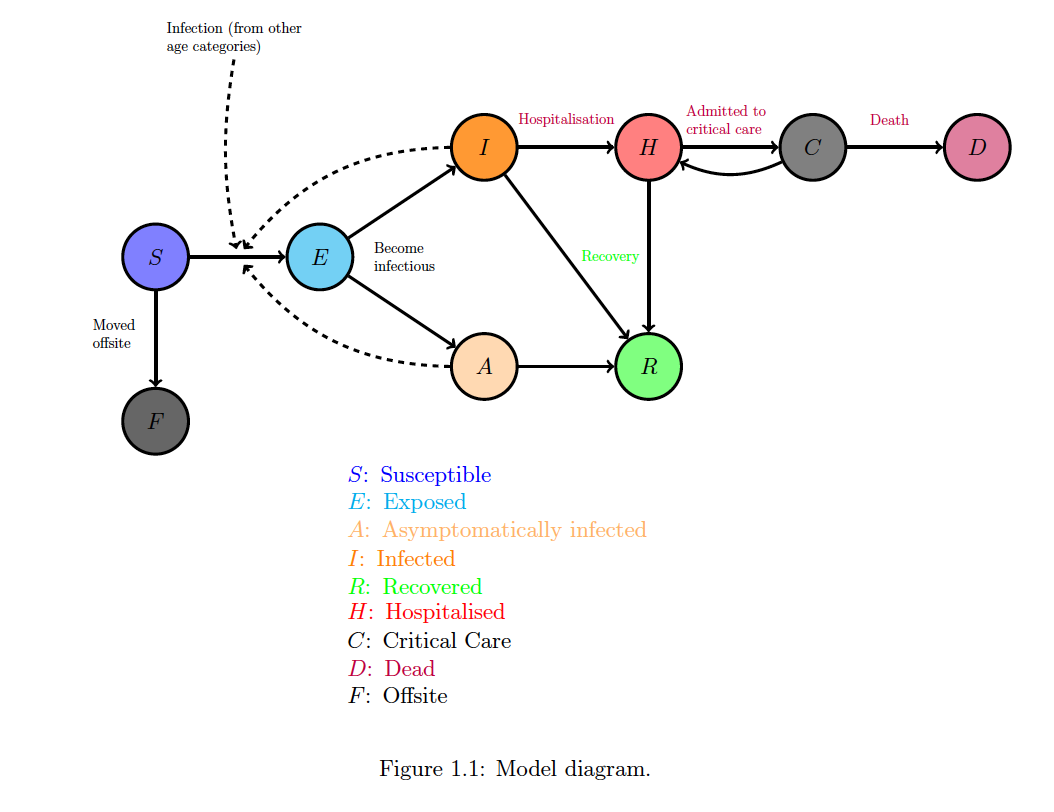

In [24]:
Image(filename='model.png',width=700,height=700) 